## 4.10 Excel Reporting

### This script will contain the following:

#### Import Libraries
#### Import High Activity Customers Dataframe
#### Customer Profiling
#### Import Department Dataframe
#### Merge Department Dataframe and High Activity Customers Dataframe
#### Visualizations
#### Aggregations
#### Compare with Regions
#### Compare with Departments
#### Export FINAL Merged Dataframe

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import High Activity Customers Dataframe

In [2]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/05-2023 Instacart Basket Analysis'

In [3]:
# Import High Activity Customers Dataframe
high_act_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_high_activity.pkl'))

In [4]:
high_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequent_user_flag,Gender,STATE,Age,date_joined,n_dependants,marriage_status,income,region,low_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity


In [5]:
high_act_cust.shape

(30959687, 34)

In [6]:
high_act_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spending_flag', 'median_days_since_prior_order',
       'frequent_user_flag', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'marriage_status', 'income', 'region',
       'low_activity_flag'],
      dtype='object')

# 03. Customer Profiling

## Age

In [7]:
# Create an Age Flag
high_act_cust.loc[high_act_cust['Age'] >= 60, 'age_flag'] = 'Senior'

In [8]:
high_act_cust.loc[(high_act_cust['Age'] >= 45) & (high_act_cust['Age'] < 60), 'age_flag'] = 'Middle Age'

In [9]:
high_act_cust.loc[(high_act_cust['Age'] >= 26) & (high_act_cust['Age'] < 45), 'age_flag'] = 'Adult'

In [10]:
high_act_cust.loc[high_act_cust['Age'] < 26, 'age_flag'] = 'Young Adult'

In [11]:
# Check Output
high_act_cust['age_flag'].value_counts()

Senior         10572857
Adult           9213092
Middle Age      7309871
Young Adult     3863867
Name: age_flag, dtype: int64

In [12]:
high_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Gender,STATE,Age,date_joined,n_dependants,marriage_status,income,region,low_activity_flag,age_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior


## Income

In [13]:
# Create income_flag
high_act_cust.loc[high_act_cust['income'] <= 50000, 'income_flag'] = 'Low income'
high_act_cust.loc[(high_act_cust['income'] >50000) & (high_act_cust['income'] <= 150000), 'income_flag'] = 'Middle income'
high_act_cust.loc[high_act_cust['income'] > 150000, 'income_flag'] = 'High income'

In [14]:
# Check output
high_act_cust['income_flag'].value_counts(dropna = False)

Middle income    23706293
High income       3890840
Low income        3362554
Name: income_flag, dtype: int64

In [15]:
high_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,STATE,Age,date_joined,n_dependants,marriage_status,income,region,low_activity_flag,age_flag,income_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income


## Number of Dependents

In [16]:
# Create dependents_flag
high_act_cust.loc[high_act_cust['n_dependants'] == 0, 'dependents_flag'] = 'Individual'
high_act_cust.loc[high_act_cust['n_dependants'] != 0, 'dependents_flag'] = 'Caregiver'

In [17]:
# Check output
high_act_cust['dependents_flag'].value_counts(dropna = False)

Caregiver     23221179
Individual     7738508
Name: dependents_flag, dtype: int64

In [18]:
high_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Age,date_joined,n_dependants,marriage_status,income,region,low_activity_flag,age_flag,income_flag,dependents_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,81,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver


## Load In Department Names

In [19]:
# Import Departments Wrangled Dataframe
depart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [20]:
depart

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [21]:
# Rename 'Unnamed: 0' as 'department_id'
depart.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [22]:
depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
# Merge depart with high_act_cust
df_merged = high_act_cust.merge(depart, on = 'department_id')

In [24]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,n_dependants,marriage_status,income,region,low_activity_flag,age_flag,income_flag,dependents_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver,snacks
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver,snacks
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver,snacks
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,high_activity,Senior,Low income,Caregiver,snacks


In [70]:
df_merged.shape

(30959687, 38)

# 04. Visualizations

## Pie Charts

### Age

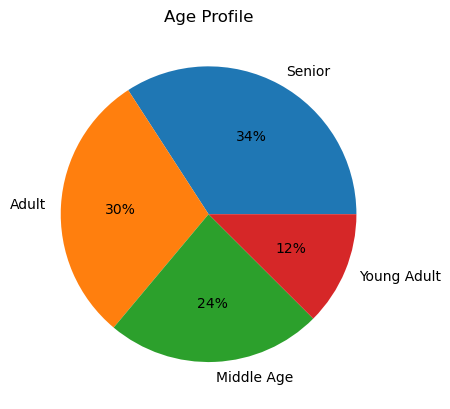

In [25]:
pie_chart_age = df_merged['age_flag'].value_counts().plot.pie(title = 'Age Profile', label = '', autopct = ('%1.f%%'))

In [26]:
# Export chart
pie_chart_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_age_cust'))

### Income

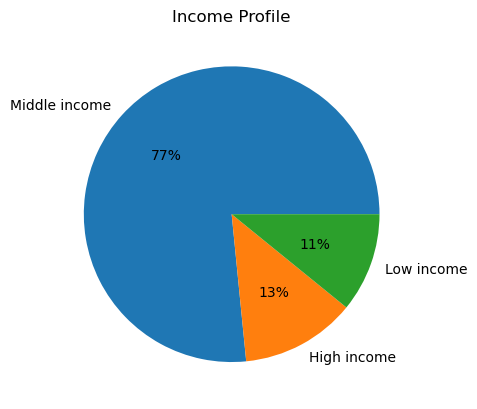

In [27]:
pie_chart_income = high_act_cust['income_flag'].value_counts().plot.pie(title = 'Income Profile', label = '', autopct = ('%1.f%%'))

In [28]:
# Export chart
pie_chart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_income'))

### Dependents

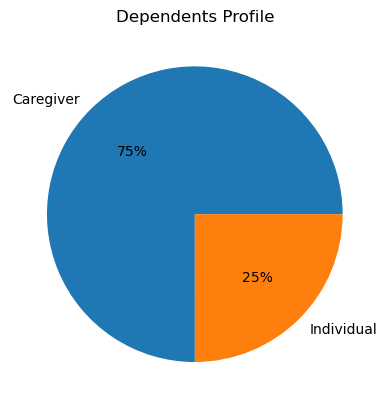

In [29]:
pie_chart_dependents = high_act_cust['dependents_flag'].value_counts().plot.pie(title = 'Dependents Profile', label = '', autopct = ('%1.f%%'))

In [30]:
# Export chart
pie_chart_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_dependents'))

# 05. Aggregations

## Age

In [31]:
age_agg = df_merged.groupby('age_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [32]:
age_agg

days_since_prior_order                  prices                  \
                               min   max       mean    min   max      mean   
age_flag                                                                     
Adult                          0.0  30.0  10.815066    1.0  25.0  7.789144   
Middle Age                     0.0  30.0  10.823754    1.0  25.0  7.788404   
Senior                         0.0  30.0  10.800550    1.0  25.0  7.795446   
Young Adult                    0.0  30.0  10.799108    1.0  25.0  7.784889   

                         
                    sum  
age_flag                 
Adult        71762097.6  
Middle Age   56932226.4  
Senior       82420137.8  
Young Adult  30079773.8

## Income

In [33]:
income_agg = high_act_cust.groupby('income_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [34]:
income_agg

days_since_prior_order                  prices                  \
                                 min   max       mean    min   max      mean   
income_flag                                                                    
High income                      0.0  30.0  10.683471    1.0  25.0  7.940855   
Low income                       0.0  30.0  11.175808    1.0  25.0  6.707347   
Middle income                    0.0  30.0  10.779372    1.0  25.0  7.919577   

                            
                       sum  
income_flag                 
High income     30896595.2  
Low income      22553818.0  
Middle income  187743822.4

## Dependents

In [35]:
dependents_agg = high_act_cust.groupby('dependents_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [36]:
dependents_agg

days_since_prior_order                  prices        \
                                   min   max       mean    min   max   
dependents_flag                                                        
Caregiver                          0.0  30.0  10.816265    1.0  25.0   
Individual                         0.0  30.0  10.791879    1.0  25.0   

                                        
                     mean          sum  
dependents_flag                         
Caregiver        7.790937  180914742.9  
Individual       7.789550   60279492.7

# 06. Compare with Regions

## Age

In [37]:
# Create Crosstab between age and region
crosstab_age_region = pd.crosstab(high_act_cust['region'], high_act_cust['age_flag'], dropna = False)

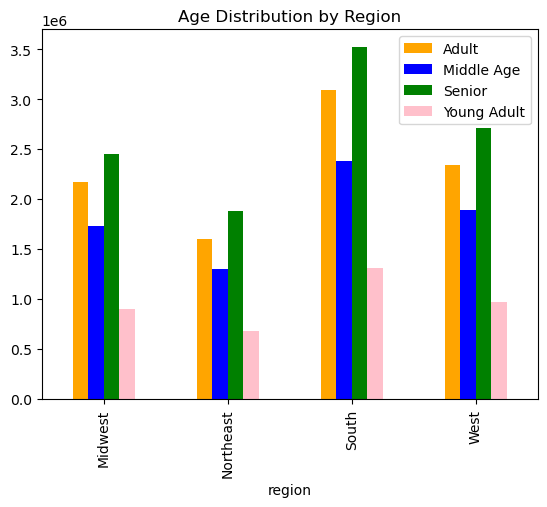

In [40]:
# Create bar chart
bar_age_region = crosstab_age_region.plot.bar(title = 'Age Distribution by Region', color = {'Young Adult': 'pink', 'Adult': 'orange', 'Middle Age': 'blue', 'Senior': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [42]:
# Export bar age region
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_region'))

## Income

In [43]:
# Create Crosstab between Income and Region
crosstab_income_region = pd.crosstab(high_act_cust['region'], high_act_cust['income_flag'], dropna = False)

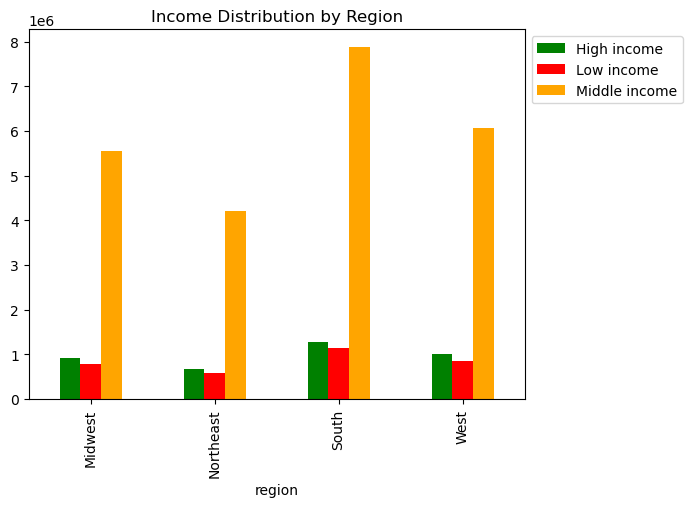

In [44]:
# Create bar chart
bar_income_region = crosstab_income_region.plot.bar(title = 'Income Distribution by Region', color = {'Low income': 'red', 'Middle income': 'orange', 'High income': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [45]:
# Export bar income region
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_region'))

## Dependents

In [47]:
# Create Crosstab between Dependents and Region
crosstab_dependents_region = pd.crosstab(high_act_cust['region'], high_act_cust['dependents_flag'], dropna = False)

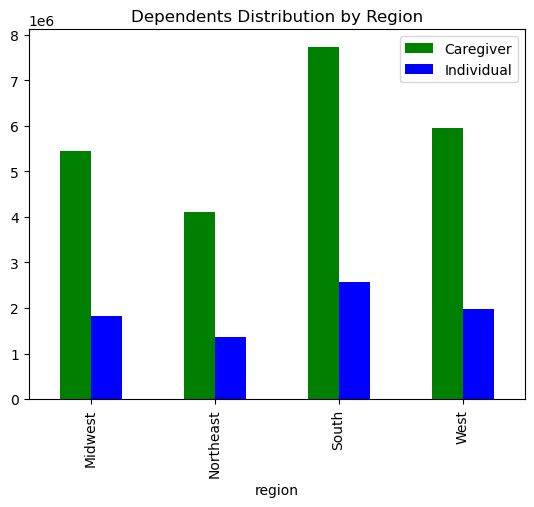

In [50]:
# Create bar chart
bar_dependents_region = crosstab_dependents_region.plot.bar(title = 'Dependents Distribution by Region', color = {'Caregiver': 'Green', 'Individual': 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [51]:
# Export bar dependents region
bar_dependents_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependents_profile_region'))

# 07. Compare with Departments

## Age

In [56]:
# Create a Crosstab between Age and Departments
crosstab_age_departments = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

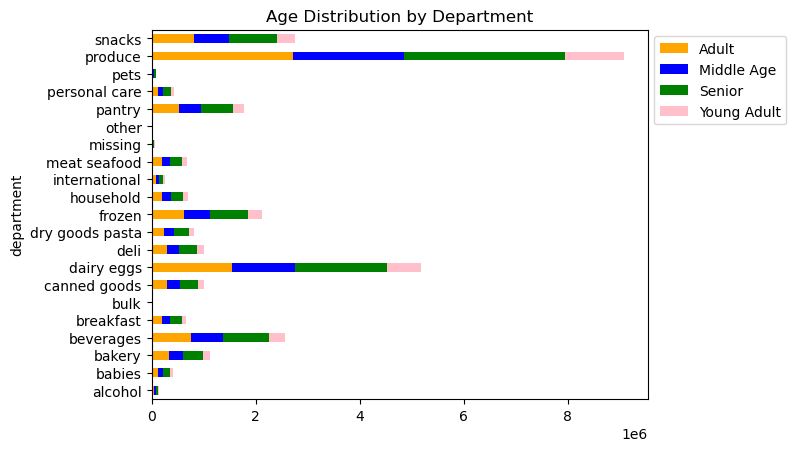

In [57]:
# Create stacked bar chart
stacked_bar_age_department = crosstab_age_departments.plot.barh(stacked = True, title = 'Age Distribution by Department', color = {'Young Adult' : 'pink', 'Adult' : 'orange', 'Middle Age' : 'blue', 'Senior' : 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [58]:
# Export chart
stacked_bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_age_departments'))

## Income

In [60]:
# Create a Crosstab between Income and Departments
crosstab_income_department = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

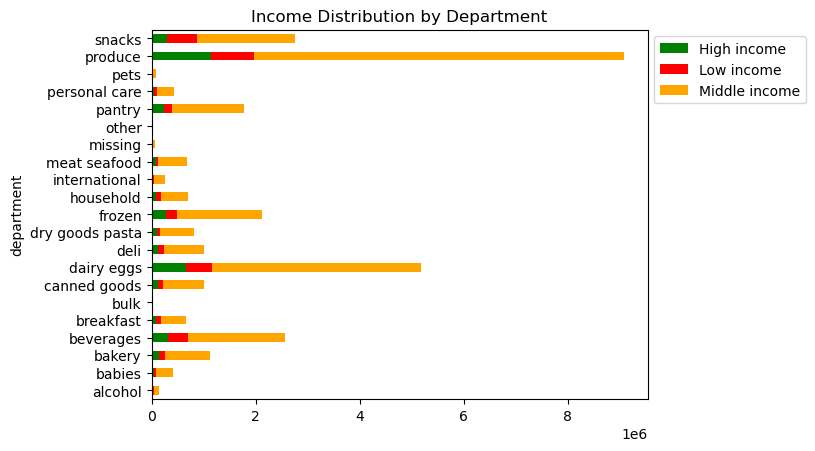

In [61]:
# Create stacked bar chart
stacked_bar_income_department = crosstab_income_department.plot.barh(stacked = True, title = 'Income Distribution by Department', color = {'Low income' : 'red', 'Middle income' : 'orange', 'High income' : 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [62]:
# Export chart
stacked_bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_income_department'))

## Dependents

In [63]:
# Create a Crosstab between Dependents and Departments
crosstab_dependents_department = pd.crosstab(df_merged['department'], df_merged['dependents_flag'], dropna = False)

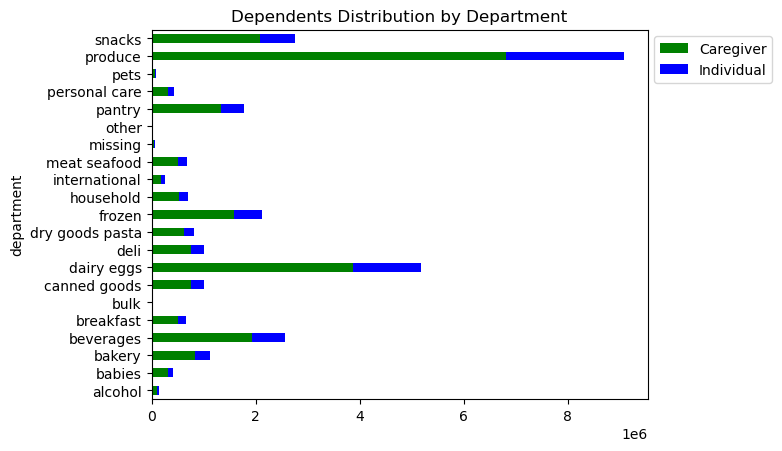

In [64]:
# Create stacked bar chart
stacked_bar_dependents_department = crosstab_dependents_department.plot.barh(stacked = True, title = 'Dependents Distribution by Department', color = {'Caregiver' : 'Green', 'Individual' : 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [65]:
# Export chart
stacked_bar_dependents_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_dependents_department'))

# 08. Export Merged Dataframe

In [68]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30959687 entries, 0 to 30959686
Data columns (total 38 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     int64   
 1   product_name                   object  
 2   aisle_id                       int64   
 3   department_id                  int64   
 4   prices                         float64 
 5   order_id                       int64   
 6   user_id                        int64   
 7   order_number                   int64   
 8   orders_day_of_week             int64   
 9   order_hour_of_day              int64   
 10  days_since_prior_order         float64 
 11  add_to_cart_order              int64   
 12  reordered                      int64   
 13  _merge                         category
 14  busiest_day                    object  
 15  price_range_loc                object  
 16  busiest_days                   object  
 17  busiest_hours            

In [69]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_FINAL.pkl'))